Fetching Data From Kaggle

In [1]:
from google.colab import files
files.upload()   # Choose kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sachi9yadav","key":"1d992ada053903e17d861584165a1146"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d usdot/flight-delays

Dataset URL: https://www.kaggle.com/datasets/usdot/flight-delays
License(s): CC0-1.0
 51% 97.0M/191M [00:00<00:00, 1.01GB/s]
100% 191M/191M [00:00<00:00, 666MB/s]  


In [5]:
!unzip flight-delays.zip -d flight_data

Archive:  flight-delays.zip
  inflating: flight_data/airlines.csv  
  inflating: flight_data/airports.csv  
  inflating: flight_data/flights.csv  


creating dataframes

In [6]:
import pandas as pd

In [7]:
data_airlines = pd.read_csv('/content/flight_data/airlines.csv')
data_airports = pd.read_csv('/content/flight_data/airports.csv')
data_flights = pd.read_csv('/content/flight_data/flights.csv')

/tmp/ipython-input-2951581261.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data_flights = pd.read_csv('/content/flight_data/flights.csv')


In [8]:
data_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


In [9]:
data_airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [10]:
unique_airlines = data_airlines['AIRLINE'].unique()
print(unique_airlines)

['United Air Lines Inc.' 'American Airlines Inc.' 'US Airways Inc.'
 'Frontier Airlines Inc.' 'JetBlue Airways' 'Skywest Airlines Inc.'
 'Alaska Airlines Inc.' 'Spirit Air Lines' 'Southwest Airlines Co.'
 'Delta Air Lines Inc.' 'Atlantic Southeast Airlines'
 'Hawaiian Airlines Inc.' 'American Eagle Airlines Inc.' 'Virgin America']


In [11]:
data_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


There are three rows whose latitude and longitude are not available.
Filling them manually by searching in google.

In the airports dataset, there were 3 missing values in the LATITUDE and LONGITUDE columns corresponding to the airports ECP (Northwest Florida Beaches International Airport), PBG (Plattsburgh International Airport), and UST (Northeast Florida Regional Airport).

To handle this, we manually filled in the missing coordinates using the correct latitude and longitude values:

ECP → (30.3549, -85.7995)

PBG → (44.6575, -73.4670)

UST → (29.9314, -81.2961)

After filling these values, the dataset has no missing entries in latitude and longitude.

In [12]:
data_airports.loc[data_airports['IATA_CODE'] == 'ECP', ['LATITUDE', 'LONGITUDE']] = [30.3549, -85.7995]
data_airports.loc[data_airports['IATA_CODE'] == 'PBG', ['LATITUDE', 'LONGITUDE']] = [44.6575, -73.4670]
data_airports.loc[data_airports['IATA_CODE'] == 'UST', ['LATITUDE', 'LONGITUDE']] = [29.9314, -81.2961]

In [13]:
data_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   322 non-null    float64
 6   LONGITUDE  322 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [14]:
data_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

### Flight Delays Dataset – Column Information  

The dataset **`flights`** contains **5.8 million rows** and **31 columns**, covering all domestic US flights in 2015.  

- **YEAR** – Year of the flight trip (all 2015).  
- **MONTH** – Month of the flight trip.  
- **DAY** – Day of the flight trip.  
- **DAY_OF_WEEK** – Day of the week (1 = Monday, 7 = Sunday).  
- **AIRLINE** – Airline carrier identifier (e.g., AA = American Airlines).  
- **FLIGHT_NUMBER** – Unique flight number.  
- **TAIL_NUMBER** – Aircraft identifier (missing in ~14.7k cases).  
- **ORIGIN_AIRPORT** – Origin airport code (628 unique airports).  
- **DESTINATION_AIRPORT** – Destination airport code (629 unique airports).  
- **SCHEDULED_DEPARTURE** – Planned departure time (HHMM format).  
- **DEPARTURE_TIME** – Actual departure time (~86k missing, ~1%).  
- **DEPARTURE_DELAY** – Delay in departure (minutes) (~86k missing, ~1%).  
- **TAXI_OUT** – Minutes between gate departure and wheels-off (~89k missing, ~2%).  
- **WHEELS_OFF** – Time when wheels leave the ground (~89k missing, ~2%).  
- **SCHEDULED_TIME** – Planned duration of the trip (~6 missing).  
- **ELAPSED_TIME** – Actual total elapsed time of the trip (~105k missing, ~2%).  
- **AIR_TIME** – Minutes between wheels-off and wheels-on (~105k missing, ~2%).  
- **DISTANCE** – Distance between origin and destination airports.  
- **WHEELS_ON** – Time when wheels touched the ground (~92k missing, ~2%).  
- **TAXI_IN** – Minutes between wheels-on and gate arrival (~92k missing, ~2%).  
- **SCHEDULED_ARRIVAL** – Planned arrival time (HHMM format).  
- **ARRIVAL_TIME** – Actual arrival time (~92k missing, ~2%).  
- **ARRIVAL_DELAY** – Difference between arrival and scheduled arrival (~105k missing, ~2%).  
- **DIVERTED** – 1 if flight diverted, 0 otherwise.  
- **CANCELLED** – 1 if flight cancelled, 0 otherwise.  
- **CANCELLATION_REASON** – Reason for cancellation:  
  - A = Airline  
  - B = Weather  
  - C = National Air System  
  - D = Security  
  (~5.73M missing, ~98%).  
- **AIR_SYSTEM_DELAY** – Delay caused by the air system (~4.76M missing, ~82%).  
- **SECURITY_DELAY** – Delay caused by security (~4.76M missing, ~82%).  
- **AIRLINE_DELAY** – Delay caused by the airline (~4.76M missing, ~82%).  
- **LATE_AIRCRAFT_DELAY** – Delay caused by a late-arriving aircraft (~4.76M missing, ~82%).  
- **WEATHER_DELAY** – Delay caused by weather (~4.76M missing, ~82%).  


In [15]:
data_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [17]:
# Clean airport codes just in case
data_airports['IATA_CODE'] = data_airports['IATA_CODE'].str.strip()

# Create dictionaries for lat/lon
lat_map = dict(zip(data_airports['IATA_CODE'], data_airports['LATITUDE']))
lon_map = dict(zip(data_airports['IATA_CODE'], data_airports['LONGITUDE']))

In [18]:
# Clean flight airport codes as well
data_flights['ORIGIN_AIRPORT'] = data_flights['ORIGIN_AIRPORT'].str.strip()
data_flights['DESTINATION_AIRPORT'] = data_flights['DESTINATION_AIRPORT'].str.strip()

# Map lat/lon for origin
data_flights['ORIGIN_LAT'] = data_flights['ORIGIN_AIRPORT'].map(lat_map)
data_flights['ORIGIN_LON'] = data_flights['ORIGIN_AIRPORT'].map(lon_map)

# Map lat/lon for destination
data_flights['DEST_LAT'] = data_flights['DESTINATION_AIRPORT'].map(lat_map)
data_flights['DEST_LON'] = data_flights['DESTINATION_AIRPORT'].map(lon_map)


In [19]:
print("ORIGIN_LAT missing:", data_flights['ORIGIN_LAT'].isnull().sum())
print("ORIGIN_LON missing:", data_flights['ORIGIN_LON'].isnull().sum())
print("DEST_LAT missing:", data_flights['DEST_LAT'].isnull().sum())
print("DEST_LON missing:", data_flights['DEST_LON'].isnull().sum())


ORIGIN_LAT missing: 486165
ORIGIN_LON missing: 486165
DEST_LAT missing: 486165
DEST_LON missing: 486165


In [20]:
print("Unique ORIGIN_AIRPORT codes:", data_flights['ORIGIN_AIRPORT'].nunique())
print("Unique DESTINATION_AIRPORT codes:", data_flights['DESTINATION_AIRPORT'].nunique())
print("Unique IATA_CODE in airports:", data_airports['IATA_CODE'].nunique())

Unique ORIGIN_AIRPORT codes: 624
Unique DESTINATION_AIRPORT codes: 624
Unique IATA_CODE in airports: 322


In [21]:
# Drop rows where any of the lat/lon columns are missing
data_flights = data_flights.dropna(subset=['ORIGIN_LAT','ORIGIN_LON','DEST_LAT','DEST_LON'])

# Confirm
print("Remaining rows:", len(data_flights))
print("Any missing ORIGIN_LAT:", data_flights['ORIGIN_LAT'].isnull().sum())


Remaining rows: 5332914
Any missing ORIGIN_LAT: 0


In [22]:
# Check result
print(data_flights[["ORIGIN_AIRPORT","ORIGIN_LAT","ORIGIN_LON","DESTINATION_AIRPORT","DEST_LAT","DEST_LON"]].head())

  ORIGIN_AIRPORT  ORIGIN_LAT  ORIGIN_LON DESTINATION_AIRPORT  DEST_LAT  \
0            ANC    61.17432  -149.99619                 SEA  47.44898   
1            LAX    33.94254  -118.40807                 PBI  26.68316   
2            SFO    37.61900  -122.37484                 CLT  35.21401   
3            LAX    33.94254  -118.40807                 MIA  25.79325   
4            SEA    47.44898  -122.30931                 ANC  61.17432   

    DEST_LON  
0 -122.30931  
1  -80.09559  
2  -80.94313  
3  -80.29056  
4 -149.99619  


In [23]:
data_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332914 entries, 0 to 5819078
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24  CAN

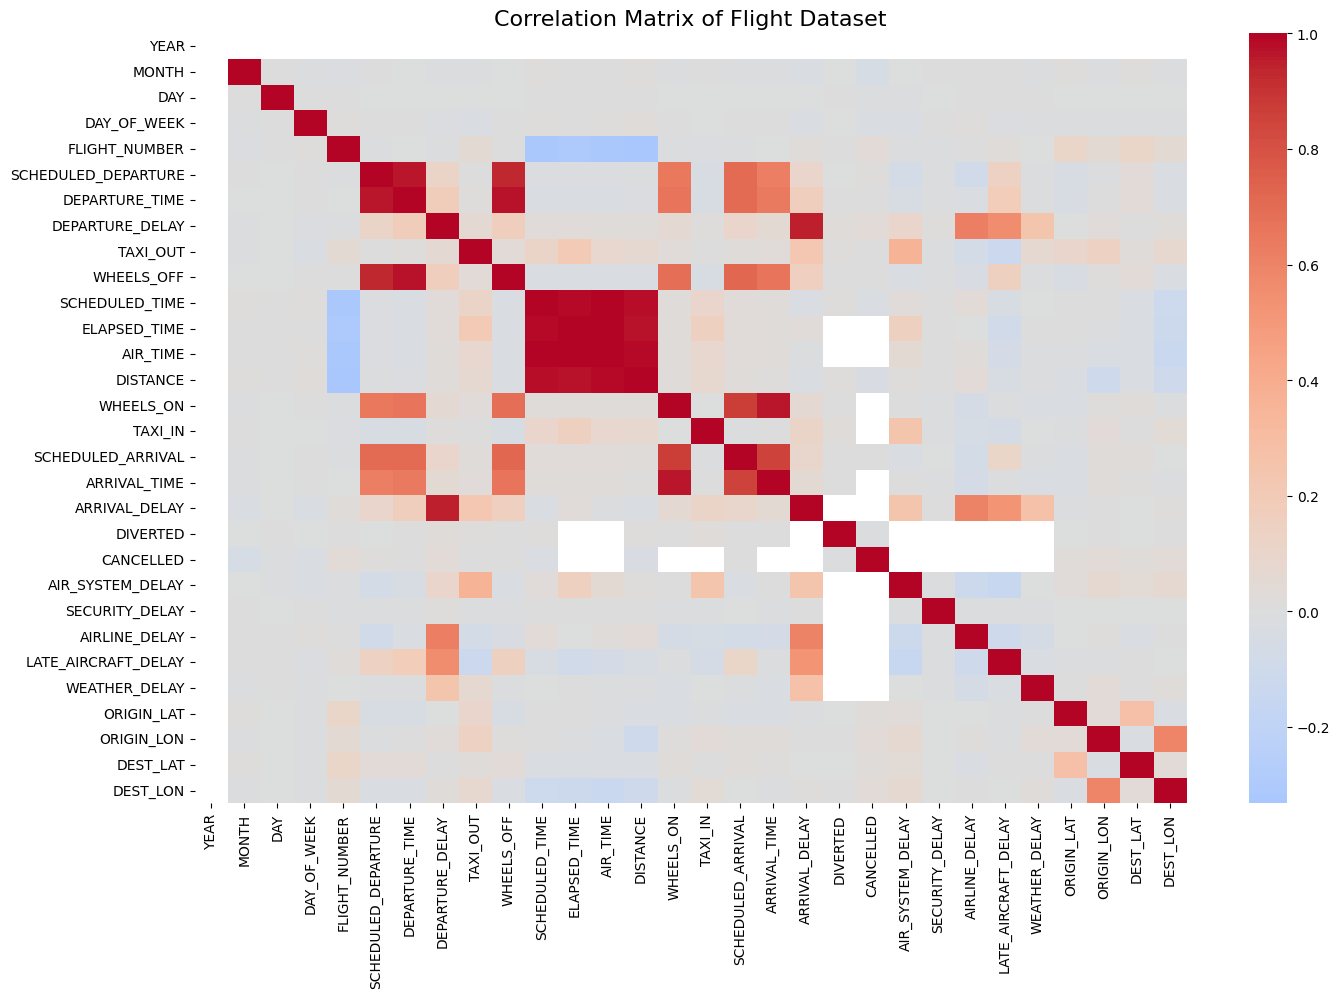

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = data_flights.select_dtypes(include=["int64", "float64"])

# Compute correlation
corr = numeric_cols.corr()

# Plot correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Flight Dataset", fontsize=16)
plt.show()


###Exploratory Data Analysis

/tmp/ipython-input-214370416.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


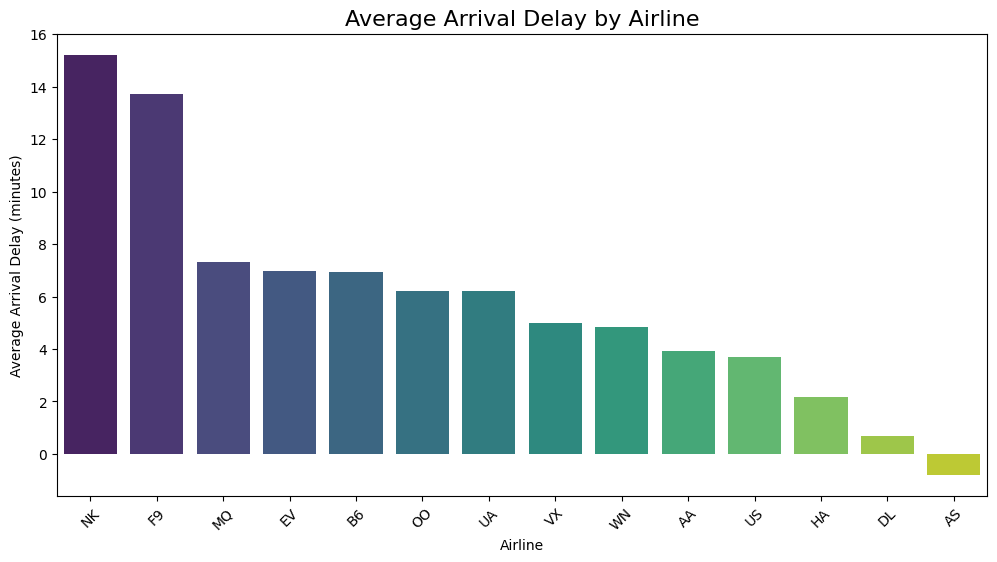

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute mean arrival delay for each airline
airline_delays = (
    data_flights.groupby("AIRLINE")["ARRIVAL_DELAY"]
    .mean()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    x=airline_delays.index,
    y=airline_delays.values,
    palette="viridis"
)
plt.xticks(rotation=45)
plt.title("Average Arrival Delay by Airline", fontsize=16)
plt.ylabel("Average Arrival Delay (minutes)")
plt.xlabel("Airline")
plt.show()


/tmp/ipython-input-3404825835.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


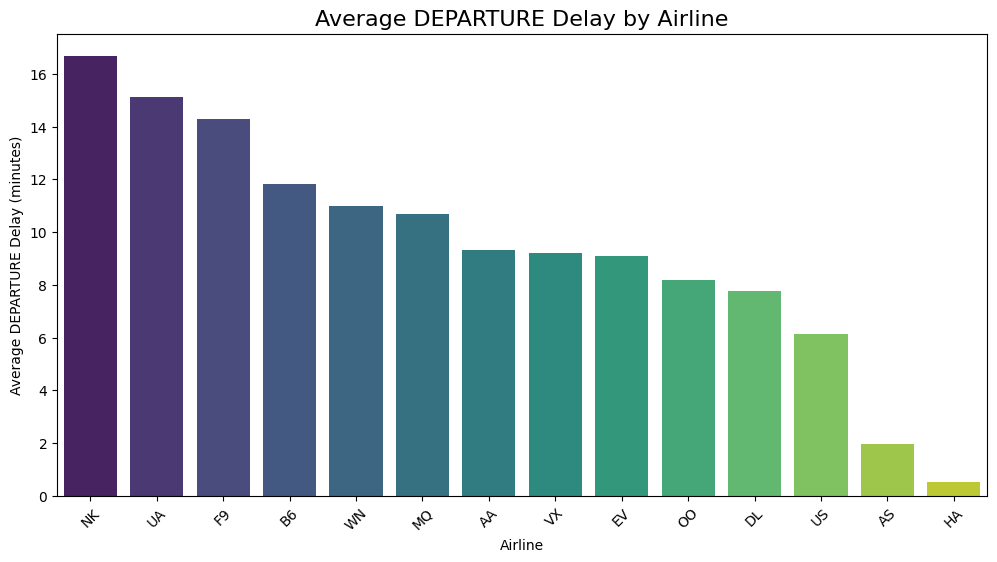

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute mean arrival delay for each airline
airline_delays = (
    data_flights.groupby("AIRLINE")["DEPARTURE_DELAY"]
    .mean()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    x=airline_delays.index,
    y=airline_delays.values,
    palette="viridis"
)
plt.xticks(rotation=45)
plt.title("Average DEPARTURE Delay by Airline", fontsize=16)
plt.ylabel("Average DEPARTURE Delay (minutes)")
plt.xlabel("Airline")
plt.show()


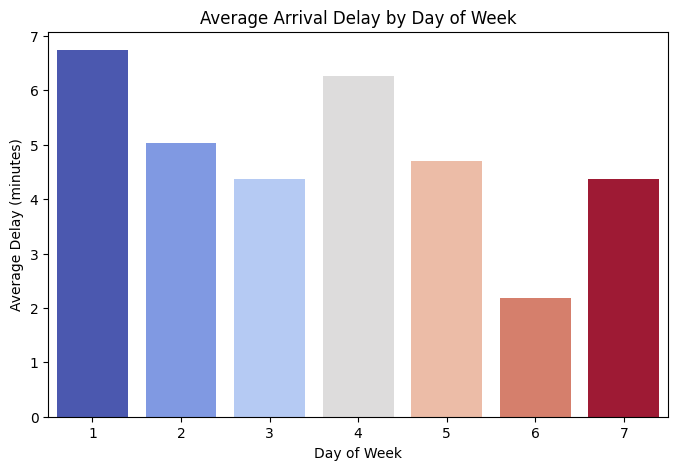

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose you already have average delays by day of week
day_delays = data_flights.groupby("DAY_OF_WEEK")["ARRIVAL_DELAY"].mean()

# Convert to DataFrame for seaborn
df_day_delays = day_delays.reset_index(name="Avg_Delay")

plt.figure(figsize=(8,5))
sns.barplot(
    data=df_day_delays,
    x="DAY_OF_WEEK",
    y="Avg_Delay",
    hue="DAY_OF_WEEK",   # fixes the FutureWarning
    palette="coolwarm",
    legend=False
)
plt.title("Average Arrival Delay by Day of Week")
plt.ylabel("Average Delay (minutes)")
plt.xlabel("Day of Week")
plt.show()


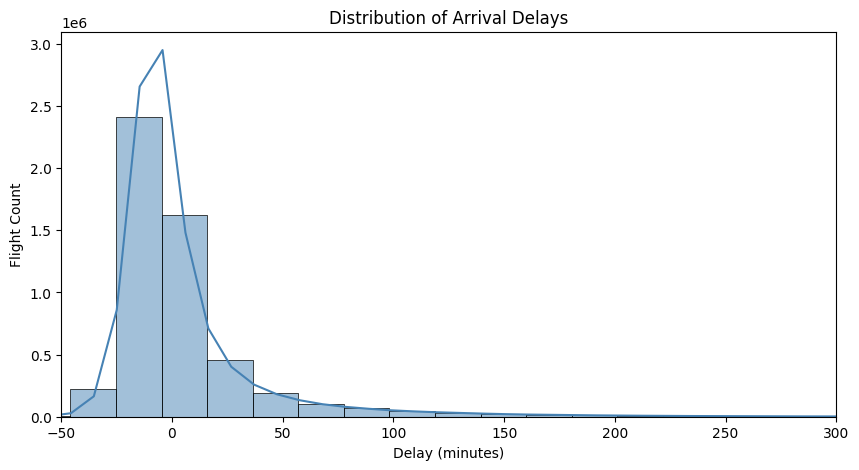

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(data_flights["ARRIVAL_DELAY"], bins=100, kde=True, color="steelblue")
plt.title("Distribution of Arrival Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Flight Count")
plt.xlim(-50, 300)   # trim to make it readable
plt.show()


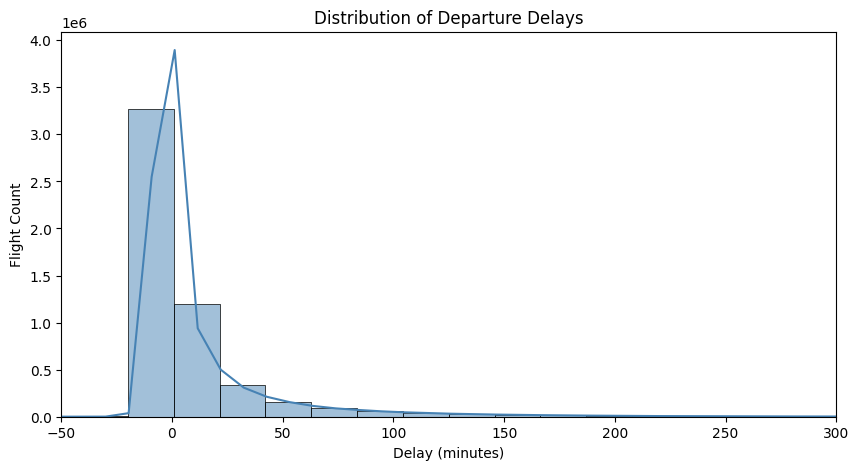

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(data_flights["DEPARTURE_DELAY"], bins=100, kde=True, color="steelblue")
plt.title("Distribution of Departure Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Flight Count")
plt.xlim(-50, 300)   # trim to make it readable
plt.show()


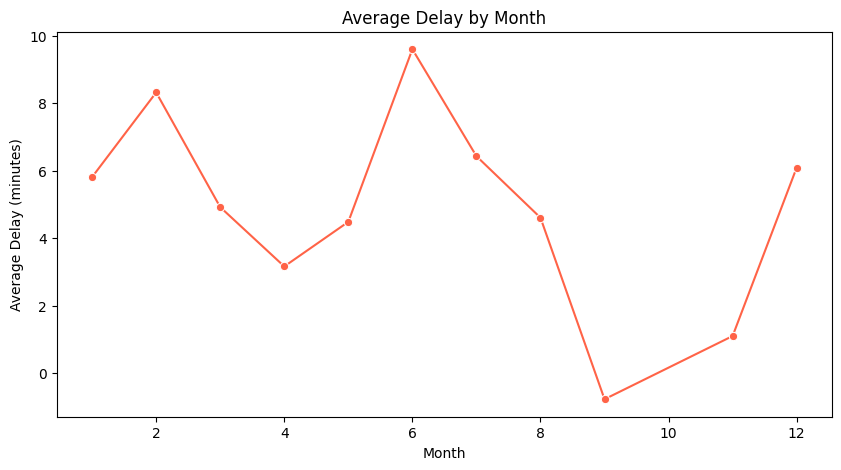

In [30]:
month_delays = (data_flights.groupby("MONTH")["ARRIVAL_DELAY"]
                .mean()
                .reset_index())

plt.figure(figsize=(10,5))
sns.lineplot(data=month_delays, x="MONTH", y="ARRIVAL_DELAY", marker="o", color="tomato")
plt.title("Average Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.show()


##MODEL TRAINING

In [31]:
data_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332914 entries, 0 to 5819078
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24  CAN

In [32]:
data_flights = data_flights.drop(columns=["ORIGIN_AIRPORT", "DESTINATION_AIRPORT","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF"])

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_flights["AIRLINE_ENCODED"] = le.fit_transform(data_flights["AIRLINE"])

In [34]:
data_flights = data_flights.drop(columns=["ELAPSED_TIME", "AIR_TIME","WHEELS_ON","ARRIVAL_TIME","TAXI_IN","DIVERTED","CANCELLED","CANCELLATION_REASON",
                                          "AIR_SYSTEM_DELAY","SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY"])

In [35]:
data_flights = data_flights.drop(columns=["AIRLINE","DAY","YEAR"])

In [36]:
# Convert HHMM -> hour of day
data_flights["SCHEDULED_DEPARTURE_HOUR"] = (data_flights["SCHEDULED_DEPARTURE"] // 100) % 24
data_flights["SCHEDULED_ARRIVAL_HOUR"] = (data_flights["SCHEDULED_ARRIVAL"] // 100) % 24

# Drop the old HHMM columns
data_flights.drop(columns=["SCHEDULED_DEPARTURE", "SCHEDULED_ARRIVAL"], inplace=True)

data_flights[["SCHEDULED_DEPARTURE_HOUR", "SCHEDULED_ARRIVAL_HOUR"]].head()


,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR
0,0,4
1,0,7
2,0,8
3,0,8
4,0,3


In [37]:
data_flights["SCHEDULED_TIME"].isnull().sum()

np.int64(6)

In [38]:
null_rows = data_flights[data_flights["SCHEDULED_TIME"].isnull()]
print(null_rows)

         MONTH  DAY_OF_WEEK  DEPARTURE_DELAY  SCHEDULED_TIME  DISTANCE  \
483174       2            7             -9.0             NaN      1176   
619941       2            2             -9.0             NaN      1176   
1720237      4            1            175.0             NaN      1076   
1820960      4            7             -2.0             NaN       641   
2031482      5            6             22.0             NaN       852   
2034453      5            7            229.0             NaN       622   

         ARRIVAL_DELAY  ORIGIN_LAT  ORIGIN_LON  DEST_LAT  DEST_LON  \
483174             NaN    26.07258   -80.15275  43.10726 -78.94538   
619941             NaN    26.07258   -80.15275  43.10726 -78.94538   
1720237            NaN    26.07258   -80.15275  40.77724 -73.87261   
1820960            NaN    39.85841  -104.66700  32.89595 -97.03720   
2031482            NaN    28.42889   -81.31603  39.45758 -74.57717   
2034453            NaN    41.97960   -87.90446  39.17540 -76.

In [39]:
import numpy as np

def compute_scheduled_time(row):
    dep = row["SCHEDULED_DEPARTURE_HOUR"]
    arr = row["SCHEDULED_ARRIVAL_HOUR"]

    # Adjust if flight crosses midnight
    if arr < dep:
        arr += 24

    return (arr - dep) * 60

# Fill only null values
data_flights.loc[data_flights["SCHEDULED_TIME"].isnull(), "SCHEDULED_TIME"] = \
    data_flights[data_flights["SCHEDULED_TIME"].isnull()].apply(compute_scheduled_time, axis=1)


In [40]:
data_flights["SCHEDULED_TIME"].isnull().sum()

np.int64(0)

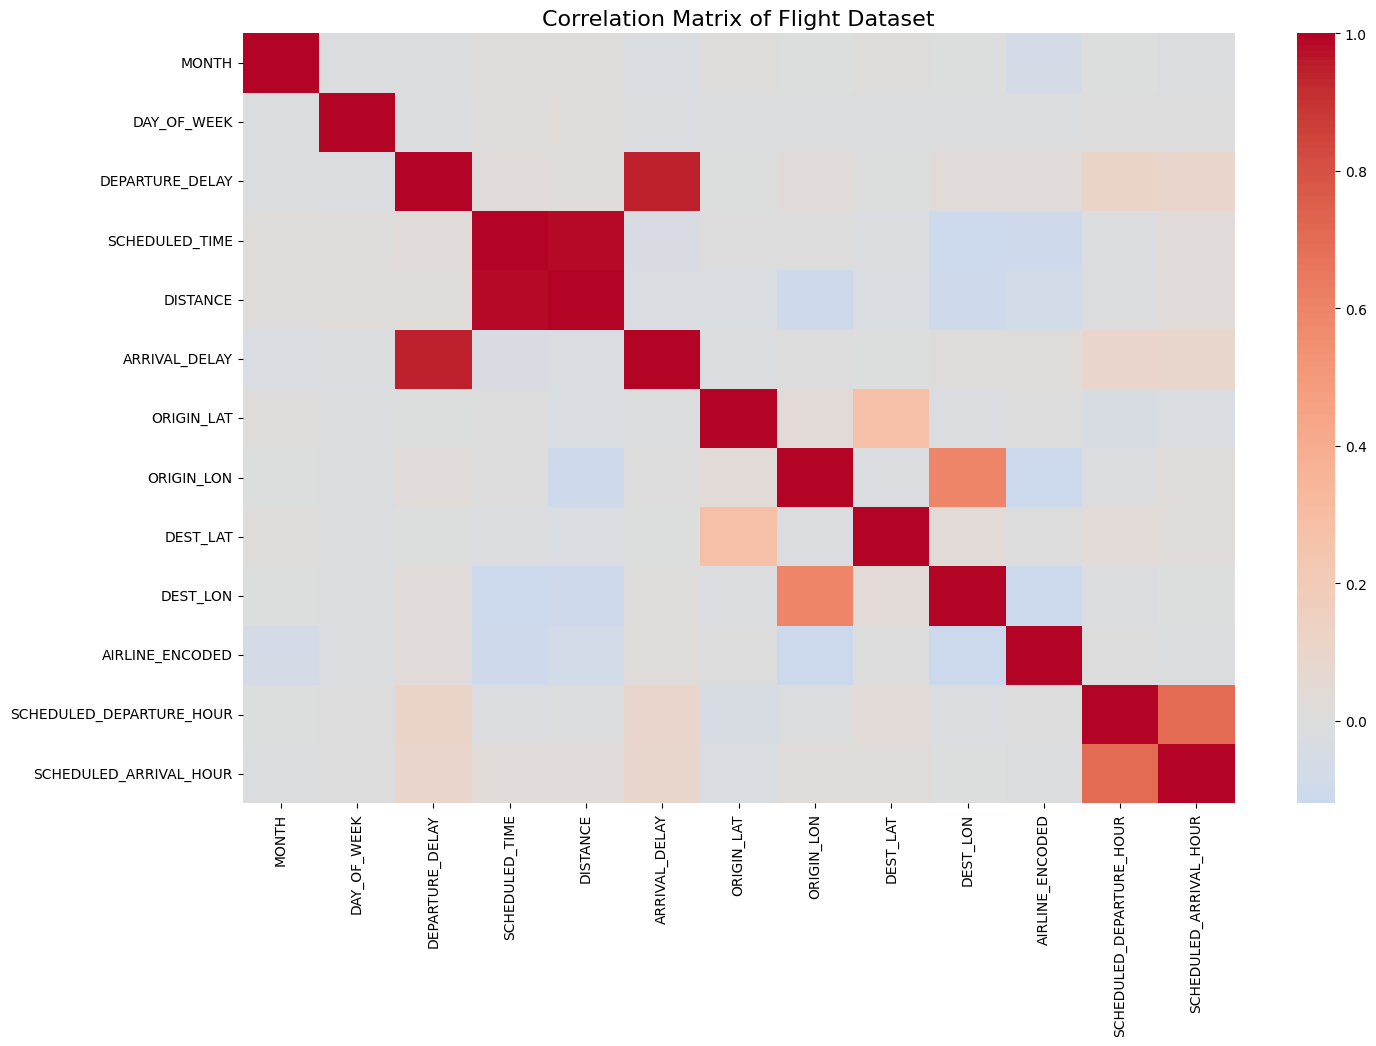

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = data_flights.select_dtypes(include=["int64", "float64"])

# Compute correlation
corr = numeric_cols.corr()

# Plot correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Flight Dataset", fontsize=16)
plt.show()


In [42]:
cancelled_rows = data_flights[data_flights['DEPARTURE_DELAY'].isnull()]
print(cancelled_rows['ARRIVAL_DELAY'].unique())

[nan]


this means that there are no arrival delay when there were no departure delay so we will remove them without any consequences

In [43]:
data_flights = data_flights.dropna(subset=['ARRIVAL_DELAY'])

In [44]:
for col in data_flights.columns:
    n_missing = data_flights[col].isnull().sum()
    print(f"{col}: {n_missing} missing values")

MONTH: 0 missing values
DAY_OF_WEEK: 0 missing values
DEPARTURE_DELAY: 0 missing values
SCHEDULED_TIME: 0 missing values
DISTANCE: 0 missing values
ARRIVAL_DELAY: 0 missing values
ORIGIN_LAT: 0 missing values
ORIGIN_LON: 0 missing values
DEST_LAT: 0 missing values
DEST_LON: 0 missing values
AIRLINE_ENCODED: 0 missing values
SCHEDULED_DEPARTURE_HOUR: 0 missing values
SCHEDULED_ARRIVAL_HOUR: 0 missing values


MODEL TRAINING

In [45]:
from sklearn.model_selection import train_test_split

X = data_flights.drop(columns=["ARRIVAL_DELAY"])
y = data_flights["ARRIVAL_DELAY"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return mae, rmse

1. Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

# Fill NaN values with the mean of each column
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

mae_lr, rmse_lr = evaluate_model(lin_reg, X_test, y_test)
print("Linear Regression → MAE:", mae_lr, "RMSE:", rmse_lr)

Linear Regression → MAE: 8.780937043258653 RMSE: 12.588968792039273


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train
rf.fit(X_train, y_train)

# Evaluate
mae_rf, rmse_rf = evaluate_model(rf, X_test, y_test)
print(f"Random Forest → MAE: {mae_rf}, RMSE: {rmse_rf}")
